In [1]:
#libraries imported
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [3]:
#create a path to the data on my pc and load the dataset to a pandas dataframe
Fraud_data = pd.read_csv("C:/Users/pc/Downloads/creditcard.csv")
Fraud_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
Fraud_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
# dataset information
Fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  int64  
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# check the number of missing values in each column
Fraud_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# checking the distribution of legit and fraudulent transactions 
#from the class column
Fraud_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

The dataset is unbalanced due to the distinction between Class counts 0 --> LEGIT TRANSACTIONS 1 --> FRAUDULENT TRANSACTIONS

In [9]:
# separating the data for analysis
legit = Fraud_data[Fraud_data.Class == 0]
fraud = Fraud_data[Fraud_data.Class == 1]


In [10]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [11]:
# get statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [12]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

C:\Users\pc\AppData\Local\Temp\ipykernel_8116\1719914341.py:5: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(Fraud_data['Class'], sort = True)


Text(0, 0.5, 'Frequency')

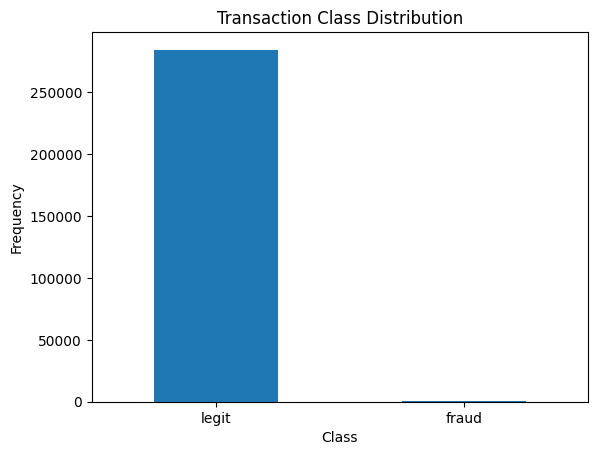

In [21]:
RANDOM_SEED = 42

LABELS = ["legit", "fraud"]

count_classes = pd.value_counts(Fraud_data['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [22]:
# compare the values for both legit and fraudulent transactions
Fraud_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,0.0,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Build a sample dataset from the original dataset containing same number of legit trsnsactions to match the total number of fraudulent transations due to undersampling.

In [24]:
# randomly select 492 legit transactions to match the 492 fraudulent transactions
# to make a even distribution
legit_sample = legit.sample(n=492)


In [25]:
# concactnating 2 dataframes (legit and fraudulent samples)
new_data = pd.concat([legit_sample, fraud], axis = 0)

In [26]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
154101,0,1.950375,-0.732294,-1.204485,-0.568751,1.506499,4.067329,-1.619239,1.056602,2.505489,...,-0.114257,-0.055509,0.364732,0.669422,-0.585260,0.462775,-0.020554,-0.049449,15.95,0
62403,0,0.943074,-0.643076,0.254094,0.387373,-0.435743,0.221093,-0.220909,-0.015034,0.504504,...,0.027250,-0.317811,-0.287679,-0.958351,0.281582,0.455875,-0.042452,0.047263,201.02,0
25621,0,0.913626,-0.640875,1.741320,1.683054,-1.224222,1.299359,-1.184436,0.629194,1.529191,...,0.032089,0.465420,-0.112853,0.058392,0.417410,-0.215653,0.108869,0.032060,55.70,0
42154,0,1.150723,0.359691,0.868861,2.752707,-0.397830,-0.158470,-0.081939,0.012467,-0.130662,...,-0.083108,-0.074514,-0.077894,0.381735,0.609883,0.079270,0.005241,0.019872,7.57,0
98052,0,1.155864,-0.085424,0.791632,1.254955,-0.616590,-0.024319,-0.382603,0.045400,0.816598,...,0.072654,0.394054,-0.224521,-0.083431,0.708059,-0.187143,0.054579,0.029392,34.95,0


In [27]:
new_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [28]:
# checking the distribution of the new dataset
new_data['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [29]:
# getting the mean of the new dataset
new_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.028739,-0.038844,0.049845,-0.073849,-0.075407,-0.003373,-0.014552,-0.051511,0.033308,...,-0.009687,0.065786,-0.004477,-0.018640,-0.017352,0.000417,-0.029159,-0.006841,-0.001275,99.444085
1,0.0,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [33]:
# splitting data into features and tergets
# drop the class column to store it in a new variable
x = new_data.drop(columns= 'Class', axis = 1)
y = new_data['Class']

In [34]:
print(x)

        Time        V1        V2        V3        V4        V5        V6  \
154101     0  1.950375 -0.732294 -1.204485 -0.568751  1.506499  4.067329   
62403      0  0.943074 -0.643076  0.254094  0.387373 -0.435743  0.221093   
25621      0  0.913626 -0.640875  1.741320  1.683054 -1.224222  1.299359   
42154      0  1.150723  0.359691  0.868861  2.752707 -0.397830 -0.158470   
98052      0  1.155864 -0.085424  0.791632  1.254955 -0.616590 -0.024319   
...      ...       ...       ...       ...       ...       ...       ...   
279863     0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143     0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149     0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144     0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674     0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  ...       V20       V21       V22  \
154101 -1.61

In [35]:
print(y)

154101    0
62403     0
25621     0
42154     0
98052     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


Splitting the data into Training and Testing data

In [36]:
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2, stratify = y, random_state=2)



In [37]:
print(x.shape, x_train.shape, x_test.shape)

(984, 30) (787, 30) (197, 30)


Model Training using the Logistic Resression Model (mostly used for binary classification)

In [53]:
model = LogisticRegression()


In [51]:
# training the Logistic Regression Model with Training Data
model.fit(x_train, y_train)

C:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Evaluate Model

In [42]:
# accuracy on training data
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [43]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9529860228716646


In [44]:
# accuracy on test data
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [46]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9441624365482234
